In [1]:
## Construct Dataframe

import pandas as pd
from multiprocessing.pool import Pool

class DataController():
    dataMatrix = pd.DataFrame(columns=["title","desc", "len_desc", "tag"])
    
    ## init will create dataMatrix
    def __init__(self, pathToFile):
        import os
        import json
        count = 0
        
        loaded_data = []
        parse_pool = Pool(6)
        start = time.time()
        with open(pathToFile, 'r', encoding='utf-8') as fin:
            lines = fin.readlines()
            parsed_data = [item for item in parse_pool.imap(self.parse_json, lines)]
        self.dataMatrix = self.dataMatrix.append(parsed_data)
                
    def parse_json(self, item):
        import json
        import os
        json_item = json.loads(item, encoding='utf-8')
        json_item['len_desc'] = len(json_item['desc'])
        return json_item

In [2]:
## Create data
import os
import time

file_name = "masterDB_JPA Data - 20180406_flatten.json"
file_path = os.getcwd()+"/../data/"+file_name

data = DataController(file_path)

In [20]:
## Get descition field of document

desc_df = data.dataMatrix.loc[data.dataMatrix['len_desc'] > 4]
desc = desc_df['desc']
doc_length = [len(item) for item in desc]

print(time.time() - start)

289.64694356918335


In [21]:
import numpy as np

doc_length = np.asarray(doc_length)
print('min: ', np.amin(doc_length))
print('5pct: ', np.percentile(doc_length, 5))
print('mean: ', np.mean(doc_length))
print('median: ', np.median(doc_length))
print('95pct: ', np.percentile(doc_length, 95))
print('max: ', np.amax(doc_length))

min:  5
5pct:  58.0
mean:  797.8734796122975
median:  584.0
95pct:  2193.0
max:  65705


In [22]:
import pandas as pd
import matplotlib.pyplot as plt

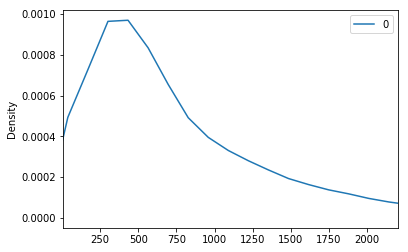

In [23]:
pd.DataFrame(doc_length).plot(kind='density', xlim=(5,2200))
plt.show()

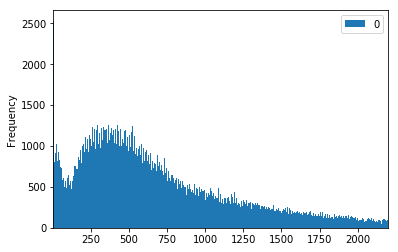

In [24]:
pd.DataFrame(doc_length).plot(kind='hist', xlim=(5,2200), bins=10000)
plt.show()

In [19]:
print(data.dataMatrix[data.dataMatrix['len_desc'] == 4])

                                                 title  desc len_desc tag
31286                                คอมพิวเตอร์กราฟิก  1. -        4    
33387                           วิศวกรอุตสาหกรรมโรงงาน  1. -        4    
138574                            งานประจำ (Full Time)  ****        4    
142975                            งานประจำ (Full Time)  ****        4    
143003                            งานประจำ (Full Time)  ****        4    
144309                            งานประจำ (Full Time)  ****        4    
145712                            งานประจำ (Full Time)  ****        4    
145719                            งานประจำ (Full Time)  ****        4    
145720                            งานประจำ (Full Time)  ****        4    
148409                            งานประจำ (Full Time)  ****        4    
154778  เจ้าหน้าที่บัญชีด้านรับ (Accounting AR Oficer)  1. -        4    
